In [2]:
import sys
print(sys.version)

3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]


In [3]:
!pip install tensorflow-cpu

In [4]:
import tensorflow as tlf

In [5]:
print(tlf.__version__)

2.16.1


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
Dataset=pd.read_csv("Churn_Modelling.csv")

In [8]:
Dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
X= Dataset.iloc[:,3:13]
y=Dataset.iloc[:,13]

In [10]:
X


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [12]:
geography=pd.get_dummies(X["Geography"],drop_first=1)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [13]:
gender=pd.get_dummies(X["Gender"],drop_first=1)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [14]:
X=X.drop(["Geography","Gender"],axis=1)

In [15]:
X


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [16]:
X=pd.concat([X,geography,gender],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [17]:
#spliting the dataset into training set and Test set
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [20]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [21]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [22]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [23]:
X_train.shape

(8000, 11)

In [24]:
X_test.shape

(2000, 11)

In [25]:
# Part2 Now lets create
from tensorflow.keras.models import Sequential

In [27]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU,ReLU
from tensorflow.keras.layers import Dropout


In [28]:
# lets intialize ANN
classifier= Sequential()

In [29]:
# Adding the input layer
classifier.add(Dense(units=11,activation="relu"))

In [30]:
# Adding the first hidden layer
classifier.add(Dense(units=7,activation="relu"))

In [31]:
# Adding the second hidden layer 
classifier.add(Dense(units=6,activation="relu"))

In [32]:
# adding the output layer 
classifier.add(Dense(units=1,activation="sigmoid"))

In [33]:
classifier.compile(optimizer="adam",loss= "binary_crossentropy", metrics=["accuracy"])

In [38]:
# customise the learning rate 
import tensorflow
opt= tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [35]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10, epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7438 - loss: 0.5737 - val_accuracy: 0.8065 - val_loss: 0.4495
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8078 - loss: 0.4308 - val_accuracy: 0.8164 - val_loss: 0.4228
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8253 - loss: 0.3944 - val_accuracy: 0.8156 - val_loss: 0.4086
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8271 - loss: 0.3772 - val_accuracy: 0.8304 - val_loss: 0.3953
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8311 - loss: 0.3836 - val_accuracy: 0.8395 - val_loss: 0.3857
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8498 - loss: 0.3675 - val_accuracy: 0.8429 - val_loss: 0.3782
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8548 - loss: 0.3492 - val_accuracy: 0.8425 - val_loss: 0.3743
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8421 - loss: 0.3559 - val_accu

536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8604 - loss: 0.3383 - val_accuracy: 0.8554 - val_loss: 0.3631
Epoch 52/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8654 - loss: 0.3243 - val_accuracy: 0.8554 - val_loss: 0.3666
Epoch 53/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8603 - loss: 0.3179 - val_accuracy: 0.8508 - val_loss: 0.3649
Epoch 54/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8695 - loss: 0.3165 - val_accuracy: 0.8504 - val_loss: 0.3655
Epoch 55/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8641 - loss: 0.3214 - val_accuracy: 0.8569 - val_loss: 0.3622
Epoch 56/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8707 - loss: 0.3049 - val_accuracy: 0.8535 - val_loss: 0.3625
Epoch 57/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8609 - loss: 0.3341 - val_accuracy: 0.8538 - val_loss: 0.3623
Epoch 58/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8683 - loss: 0.3139 - val_accuracy:

In [42]:
import tensorflow as tlf

In [43]:
!pip install keras

In [44]:
import keras

In [47]:
 early_stopping= tlf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [48]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10, epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8763 - loss: 0.3085 - val_accuracy: 0.8455 - val_loss: 0.3764
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8692 - loss: 0.3124 - val_accuracy: 0.8554 - val_loss: 0.3646
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8682 - loss: 0.3291 - val_accuracy: 0.8504 - val_loss: 0.3681
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8738 - loss: 0.3132 - val_accuracy: 0.8512 - val_loss: 0.3683
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8773 - loss: 0.3150 - val_accuracy: 0.8531 - val_loss: 0.3660
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8675 - loss: 0.3169 - val_accuracy: 0.8523 - val_loss: 0.3679
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8661 - loss: 0.3254 - val_accuracy: 0.8538 - val_loss: 0.3672
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8744 - loss: 0.3118 - 

In [49]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

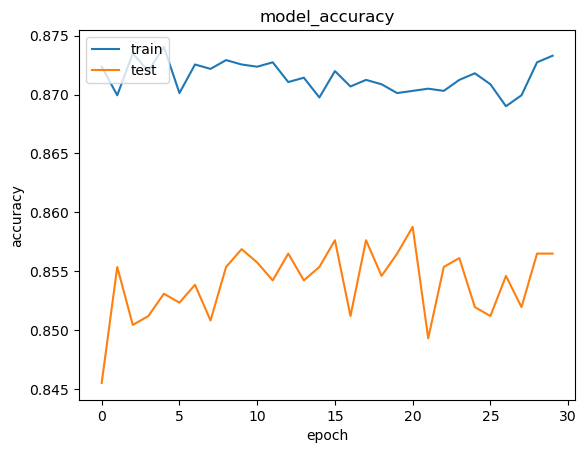

In [50]:
#summarize history for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()


In [51]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [52]:
## confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[1496,   99],
       [ 192,  213]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8545

In [57]:
# get the weights
classifier.get_weights()

[array([[ 6.20916523e-02, -5.71098089e-01,  1.20117605e-01,
         -1.54381946e-01,  3.20888668e-01, -1.90981805e-01,
         -3.76654804e-01,  3.58618557e-01,  6.75078034e-02,
          3.62165794e-02,  1.37208611e-01],
        [-8.08524489e-01,  4.59479004e-01,  3.17883044e-01,
          1.81196481e-01,  1.98644042e-01,  9.15803373e-01,
          5.22279620e-01,  1.32998616e-01, -6.23362243e-01,
         -6.69856891e-02, -9.00448024e-01],
        [-1.51310712e-01, -6.63824439e-01, -4.35651422e-01,
         -2.23230019e-01,  1.03199542e+00, -3.69524300e-01,
          3.60652238e-01,  4.66553986e-01,  1.50500759e-01,
         -1.05943158e-01,  2.08055660e-01],
        [-1.50032789e-01, -1.56499028e-01,  9.33446348e-01,
         -8.97030711e-01, -6.05498143e-02,  1.27027556e-03,
         -6.45027906e-02, -8.02694798e-01, -3.00851077e-01,
         -3.58952671e-01, -1.59924328e-01],
        [ 2.48926636e-02, -4.10203367e-01, -1.37322828e-01,
         -1.05942190e+00, -7.49021620e-02,  